# PCML PROJECT

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
print(tX.shape)

(250000, 30)


## Data Normalization 

In [3]:
def normalize(tX):
    nullValue = -999
    tX[tX==nullValue] = 0
    m = np.mean(tX, axis=0)
    tX_centered = tX - m

    tX_centered[tX_centered==0] = float('nan')
    tX_std= np.nanstd(tX_centered, axis=0)
    tX_centered[tX_centered==float('nan')] = 0
    normalized = tX_centered / tX_std
    return normalized

In [4]:
# Test normalize function
#print(tX)
#norm = normalize(tX)

In [120]:
# Probably useless

def removeNullColumns(tX, threshold):
    nullValue = -999
    rows, columns = tX.shape
    toDelete = []
    
    for column in range(0, columns):
        xi = tX[column]
        xi[xi == nullValue] = np.nan
        m = np.nansum(xi)
        if (m / rows > threshold):
            toDelete.append(column)
            
    print("Columns deleted: ", toDelete)
    new = np.delete(tX, toDelete)  
    print("new", new.shape)
    return new
        

In [75]:
# Probably useless too

def replaceNullValue(tX):
    nullValue = -999
    rows, columns = tX.shape
    x = tX
    
    for column in range(0, columns):
        xi = x[column]
        xi[xi == nullValue] = np.nan
        mean = np.mean(xi)
        nanIndex = np.where(np.isnan(xi))
        xi[nanIndex] = mean
        x[column] = xi
    return tX

## Process Machine Learning

In [25]:
from least_squares import *
from regression import *

def learn_with(method, y, tx, gamma=0.1, max_iters=5, lambda_=0.1):
    if method == 'least_squares':
        return least_squares(y, tx)
    
    if method == 'least_square_GD': 
        return least_squares_GD(y, tx, gamma, max_iters)

    if method == 'least_square_SGD': 
        return least_squares_SGD(y, tx, gamma, max_iters)

    if method == 'logistic_regression': 
        return logistic_regression(y, tx, gamma, max_iters)

    if method == 'pen_logistic_regression': 
        return pen_logisitic_regression(y, tx, lambda_, gamma, max_iters)
    
    if method == 'ridge_regression': 
        return ridge_regression(y, tx, lambda_)
    
    return least_squares(y, tx)

### Training

In [6]:
from helpers import standardize

normalizedtX = normalize(tX)
print(normalizedtX.shape)
x = np.hstack((np.ones((normalizedtX.shape[0],1)), normalizedtX))
loss, weights = learn_with("least_square_GD", y, x)
print(weights.shape)

(250000, 30)


TypeError: least_squares_GD() missing 1 required positional argument: 'gamma'

## Optimazing

## Improving Least_Squares

We search the gamma parameter that minimize the loss.

Gammas: [ 0.          0.26315789  0.52631579  0.78947368  1.05263158  1.31578947
  1.57894737  1.84210526  2.10526316  2.36842105  2.63157895  2.89473684
  3.15789474  3.42105263  3.68421053  3.94736842  4.21052632  4.47368421
  4.73684211  5.        ]
Step 1 over 20
   - loss_tr: 0.5, loss_te: 0.5
Step 2 over 20
   - loss_tr: 8365991.796477958, loss_te: 8362117.178264622
Step 3 over 20
   - loss_tr: 16649381685.043402, loss_te: 16642025208.352829
Step 4 over 20
   - loss_tr: 1186849669169.8503, loss_te: 1186333098867.9285
Step 5 over 20
   - loss_tr: 23393963665063.477, loss_te: 23383856906265.71
Step 6 over 20
   - loss_tr: 231830818451717.6, loss_te: 231731104247959.8
Step 7 over 20
   - loss_tr: 1495785206890489.8, loss_te: 1495143733077286.5
Step 8 over 20
   - loss_tr: 7195610266605268.0, loss_te: 7192530850646300.0
Step 9 over 20
   - loss_tr: 2.795828708204025e+16, loss_te: 2.7946340850144756e+16
Step 10 over 20
   - loss_tr: 9.234821663727038e+16, loss_te: 9.230880535593618e+1

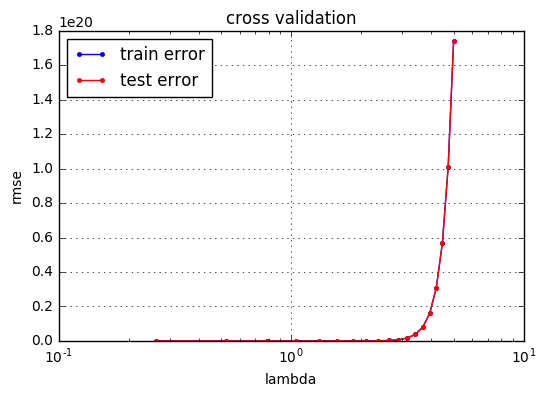

In [27]:
from cross_validation import *

k_fold = 2
nbPoints = 20
gammaRange = np.linspace(0, 5, nbPoints)
losses_tr = []
losses_te = []
x_norm = normalize(tX) 
print("Gammas: {}".format(gammaRange))
i = 0    
for gamma in range(nbPoints):
    i = i + 1
    print("Step", i, "over", nbPoints)
    loss_train = []
    loss_test = []
    initial_w = np.zeros((tX.shape[1]))
     
    for k in range (k_fold):
        loss_tr, loss_te = cross_validation(y, x_norm, k_fold, k, 0, initial_w, gamma, "least_squares_GD")
        loss_train.append(loss_tr)
        loss_test.append(loss_te)
        
    
    # rmse of the mean mse
    loss_tr = np.sum(loss_train, axis=0)/k_fold
    loss_te = np.sum(loss_test, axis=0)/k_fold
    losses_tr.append(loss_tr)
    losses_te.append(loss_te)
    print("   - loss_tr: {}, loss_te: {}".format(loss_tr, loss_te))
cross_validation_visualization(gammaRange, losses_tr, losses_te)
    
#bestGammaIdx = np.where(losses == np.ndarray.min(losses))
#bestGamma = gammaRange[bestGammaIdx]
#print("Best gamma value is: {}".format(bestGamma))

## Improving Logistic_regression

We search the gamma parameter that minimize the loss.

In [12]:
nbPoints = 20
gammaRange = np.linspace(0, 5, nbPoints)
losses = np.zeros(nbPoints)
    
for i in range(nbPoints):
    gamma = gammaRange[i]
    # TODO crossvalidation
    #losses[i] = loss
    print("gamma = {},  loss = {}".format(gamma, loss))

plt.plot(gammaRange, losses)
bestGammaIdx = np.where(losses == np.ndarray.min(losses))
bestGamma = gammaRange[bestGammaIdx]
print("Best gamma value is: {}".format(best))

NameError: name 'loss' is not defined

## Improving Penalized Logistic Regression

We need to optimize the parameters lambda and gamma in order to minimize the loss

In [ ]:
TODO

### Predicting

In [186]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
print(tX_test.shape)



(568238, 30)


## Prepare tX_test

In [187]:
tXTe = normalize(tX_test)
tXTe = np.hstack((np.ones((tX_test.shape[0],1)), tXTe))


In [189]:
OUTPUT_PATH = '../output/out.csv'

y_pred = predict_labels(weights, tXTe)

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)